In [25]:
import os
import pandas as pd
import glob
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import shutil

In [26]:
base_dir = 'PlantDoc-Dataset-windows-compatible'

In [27]:
#тут уже данные поделены

train_dir=os.path.join(base_dir, 'train')
test_dir=os.path.join(base_dir, 'test')

In [28]:
#код, чтобы вспомнить в каком классе было только 2 изображения

train_labels = []
for imagePath in os.listdir(train_dir):
	l = imagePath
	train_labels.append(l)

test_labels = []
for imagePath in os.listdir(test_dir):
	l = imagePath
	test_labels.append(l)

train_labels.sort()
test_labels.sort()

if train_labels == test_labels:
    print("The lists are identical")
else:
    print("The lists are not identical")

print(list(set(train_labels) - set(test_labels)))

path = Path(os.path.join(train_dir, 'Tomato two spotted spider mites leaf'))

print(len(list(path.iterdir())))

The lists are identical
[]


FileNotFoundError: [Errno 2] No such file or directory: 'PlantDoc-Dataset-windows-compatible/train/Tomato two spotted spider mites leaf'

In [5]:
shutil.rmtree(os.path.join(train_dir, 'Tomato two spotted spider mites leaf'))

In [29]:
#в test нет одного класса, в train этот класс содержит 2 изображения
#берем классы только из test и забываем про класс из 2 изображений

plant_labels = []
for imagePath in os.listdir(test_dir):
	l = imagePath.split(os.path.sep)[-1].split(" ", 1)
	plant_labels.append(l)

classes_list = []
for item in plant_labels:
    if item[0] not in classes_list:
        classes_list.append(item[0])
    if item[1] not in classes_list:
        classes_list.append(item[1])

classes_list.remove('leaf')

In [30]:
classes_list

['Corn',
 'leaf blight',
 'Apple',
 'Soyabean',
 'Blueberry',
 'Tomato',
 'mold leaf',
 'Raspberry',
 'rust leaf',
 'Septoria leaf spot',
 'Cherry',
 'Bell_pepper',
 'leaf late blight',
 'leaf bacterial spot',
 'leaf mosaic virus',
 'leaf yellow virus',
 'Potato',
 'leaf early blight',
 'Squash',
 'Powdery mildew leaf',
 'Peach',
 'grape',
 'leaf black rot',
 'Scab Leaf',
 'leaf spot',
 'Strawberry',
 'Early blight leaf',
 'Gray leaf spot']

In [31]:
#этот кусок кода был просто тестовый

for lists in os.listdir(train_dir):
    path = os.path.join(train_dir, lists)
    for filename in glob.glob(path+'/*'):
        p_l = lists.split(os.path.sep)[-1].split(" ", 1)
        img_class=[]
        if p_l[0] in classes_list:
            img_class.append(p_l[0])
        if p_l[1] in classes_list:
            img_class.append(p_l[1])

In [32]:
#тут если хочешь сам функцию сделай для train и test

with open('plantdoc_annotation.csv', 'w', newline='') as file:
    file.write("id;classes;")
    file.write('\n')
    for lists in os.listdir(train_dir):
        path = os.path.join(train_dir, lists)
        for filename in glob.glob(path+'/*'):
            file.write(os.path.basename(filename))
            file.write(';')
            p_l = lists.split(os.path.sep)[-1].split(" ", 1)
            img_class=[]
            if p_l[0] in classes_list:
                img_class.append(p_l[0])
            if p_l[1] in classes_list:
                img_class.append(p_l[1])
            file.write(str(img_class))
            file.write(';')
            file.write('\n')
    for lists in os.listdir(test_dir):
        path = os.path.join(test_dir, lists)
        for filename in glob.glob(path+'/*'):
            file.write(os.path.basename(filename))
            file.write(';')
            p_l = lists.split(os.path.sep)[-1].split(" ", 1)
            img_class=[]
            if p_l[0] in classes_list:
                img_class.append(p_l[0])
            if p_l[1] in classes_list:
                img_class.append(p_l[1])
            file.write(str(img_class))
            file.write(';')
            file.write('\n')

In [33]:
classes_list

['Corn',
 'leaf blight',
 'Apple',
 'Soyabean',
 'Blueberry',
 'Tomato',
 'mold leaf',
 'Raspberry',
 'rust leaf',
 'Septoria leaf spot',
 'Cherry',
 'Bell_pepper',
 'leaf late blight',
 'leaf bacterial spot',
 'leaf mosaic virus',
 'leaf yellow virus',
 'Potato',
 'leaf early blight',
 'Squash',
 'Powdery mildew leaf',
 'Peach',
 'grape',
 'leaf black rot',
 'Scab Leaf',
 'leaf spot',
 'Strawberry',
 'Early blight leaf',
 'Gray leaf spot']

In [34]:
img_metadata = pd.read_csv('plantdoc_annotation.csv',sep=';')
img_metadata = img_metadata.drop('Unnamed: 2', axis=1)
img_metadata['id'] = img_metadata['id'].apply(lambda x: 'plantsdoc/' + x)
img_metadata['classes'] = img_metadata['classes'].apply(lambda x: eval(x))
img_metadata.head()

,id,classes
0,plantsdoc/ga-2015-05-20-nclb.jpg,"[Corn, leaf blight]"
1,plantsdoc/corn-disease-update-fig-1-northern-l...,"[Corn, leaf blight]"
2,plantsdoc/corn-BLS-irregular-lesions.jpg,"[Corn, leaf blight]"
3,plantsdoc/186116-325x209-Northern-Corn-Leaf-Bl...,"[Corn, leaf blight]"
4,plantsdoc/nclb-2015-n-mcghee.jpg,"[Corn, leaf blight]"


In [35]:
img_metadata.classes

0               [Corn, leaf blight]
1               [Corn, leaf blight]
2               [Corn, leaf blight]
3               [Corn, leaf blight]
4               [Corn, leaf blight]
                   ...             
2571    [Tomato, Early blight leaf]
2572         [Corn, Gray leaf spot]
2573         [Corn, Gray leaf spot]
2574         [Corn, Gray leaf spot]
2575         [Corn, Gray leaf spot]
Name: classes, Length: 2576, dtype: object

In [36]:
all_classes = img_metadata['classes'].apply(pd.Series).stack().tolist()

# Извлекаем уникальные классы с помощью set
unique_classes = set(all_classes)

# Если нужно получить результат в виде списка
unique_classes_list = np.array(list(unique_classes))

print(unique_classes_list)

['Peach' 'Tomato' 'Bell_pepper' 'Septoria leaf spot' 'Potato' 'Apple'
 'leaf bacterial spot' 'Scab Leaf' 'leaf early blight' 'leaf yellow virus'
 'Cherry' 'leaf blight' 'grape' 'Blueberry' 'Early blight leaf'
 'leaf late blight' 'leaf mosaic virus' 'Gray leaf spot' 'mold leaf'
 'rust leaf' 'Squash' 'leaf black rot' 'Raspberry' 'Soyabean'
 'Powdery mildew leaf' 'leaf spot' 'Strawberry' 'Corn']


In [37]:
unique_classes_list.shape

(28,)

In [16]:
#тут тоже хочешь сделай функцию если тебя сильно коробит

!mkdir -p plants_doc
destination_directory = 'plantsdoc/'

for lists in tqdm(os.listdir(train_dir)):
    path = os.path.join(train_dir, lists)
    for filename in glob.glob(path+'/*'):
        shutil.copy2(filename, destination_directory)
        
for lists in tqdm(os.listdir(test_dir)):
    path = os.path.join(test_dir, lists)
    for filename in glob.glob(path+'/*'):
        shutil.copy2(filename, destination_directory)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 39.66it/s]


Text(0.5, 1.0, "['Corn', 'leaf blight']")

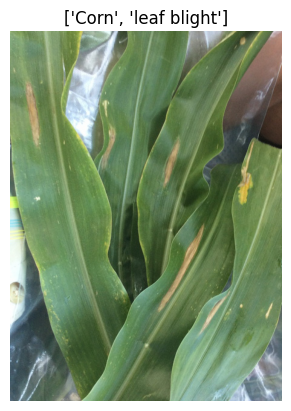

In [38]:
img = plt.imread(img_metadata.id[0])
plt.imshow(img)
plt.axis('off')
plt.title((img_metadata.classes[0]))